# Laboratorio Modulo C - scikit learn - Introduzione e supervised learning

## Introduzione

Sito ufficiale: https://scikit-learn.org/stable/

scikit learn è una libreria open source che mette a disposizione molteplici algoritmi di apprendimento supervisionato e non supervisionato. Fornisce inoltre diversi strumenti per model fitting, preprocessamento dei dati e valutazione di modelli.

## Installazione

Esistono diverse possibilità per installare la libreria, sono tutte elencate al seguente link: https://scikit-learn.org/stable/install.html#installation-instructions

Noi scegliamo la più veloce e semplice, tramite package manager `pip`.
```
pip install -U scikit-learn
```
Per testare l'installazione:
```bash
python -m pip show scikit-learn  # per controllare la versione installata
python -c "import sklearn; sklearn.show_versions()"
```

Un metodo alternativo per l'installazione (consigliato) è tramite l'utilizzo di un virtual environment (conda):
```
conda create -n sklearn-env -c conda-forge scikit-learn  # creo un nuovo environment
conda activate sklearn-env  # attivo l'environment
```
Per testare l'installazione:
```
conda list scikit-learn
python -c "import sklearn; sklearn.show_versions()"
```

Su google colab, si utilizza il seguente comando (cliccare sul simbolo play che appare quando si sposta il cursore del mouse sopra `[ ]` nel blocco successivo)

In [1]:
!pip install scikit-learn

In [2]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.12 (default, Oct 12 2021, 13:49:34)  [GCC 7.5.0]
executable: /home/damiano/anaconda3/bin/python
   machine: Linux-4.4.0-19041-Microsoft-x86_64-with-glibc2.17

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.2
        numpy: 1.20.3
        scipy: 1.7.3
       Cython: 0.29.25
       pandas: 1.4.1
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


Per visualizzare i risultati dei diversi algoritmi si può utilizzare la libreria matplotlib: https://matplotlib.org/

Per installarla, si può utilizzare pip o conda: https://matplotlib.org/stable/index.html
```
# con pip
pip install -U matplotlib
# con conda, nel virtual environment creato per scikit-learn
conda install matplotlib
```
Su google colab matplotlib è già disponibile ed è possibile utilizzarla con

In [3]:
import matplotlib as mpl
# 'as' viene utiizzato per specificare un nome locale per la libreria

A questo link https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb potete trovare un notebook colab che spiega passo passo diverse funzionalità di matplotlib.

## Primi passi: importazione dataset

scikit learn mette a disposizione diversi dataset. Vediamone un esempio.

(1797, 64)


<Figure size 432x288 with 0 Axes>

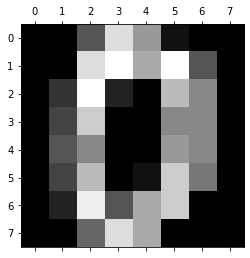

In [4]:
# digits dataset
# importo la libreria per disegnare i grafici
import matplotlib.pyplot as plt

# importo i dataset di scikit learn
from sklearn import datasets

# carico il dataset digits
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
digits = datasets.load_digits()

# stampo le caratteristiche del dataset
# mi aspetto (1797, 64): 1797 campioni (immagini) di dimensione 64 (8X8)
print(digits.data.shape)

# imposto grafico bianco e nero
plt.gray()

# le immagini sono array di 64 valori: con matshow posso rappresentare un array
# come matrice. In questo caso considero il primo elemento
plt.matshow(digits.images[0])

# mostro il grafico
plt.show()



# Supervised Learning: alberi decisionali (decision tree) e random forest

## Decision Tree

### Classificazione con decision tree

Carichiamo il dataset iris: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [5]:
from sklearn.datasets import load_iris

Carichiamo la classe che implementa i metodi per [classificazione con alberi decisionali](https://scikit-learn.org/stable/modules/tree.html#tree): [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Carichiamo la classe che ci permette di suddividere il dataset in training e test.

In [7]:
from sklearn.model_selection import train_test_split

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

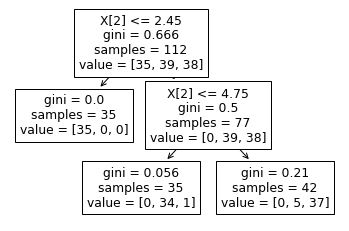

In [12]:
state = 42

# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.htm
iris = load_iris()

# di default il dataset viene suddiviso in 75% training e 25% test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=state)

clf = DecisionTreeClassifier(max_depth=2, random_state=state)
clf.fit(X_train, y_train)

# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.htm
plot_tree(clf)

# ogni campione ha 4 valori: Sepal Length, Sepal Width, Petal Length e Petal Width.
# print(X_train[0])
# 3 calssi: Iris Setosa, Iris Versicolour e Iris Virginica
# print(len(set(y_train)))


Per valutare la bontà di un classificatore posso utilizzare l'accuratezza https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [10]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


o la matrice di confusione https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

La matrice di confusione per classificazione binaria è

\begin{matrix}
  & \mathrm{Positivi} \ \mathrm{(reale)} & \mathrm{Negativi} \ \mathrm{(reale)}\\
\mathrm{Positivi} \ \mathrm{(predetto)} & \mathrm{TP} & \mathrm{FP} \\
\mathrm{Negativi} \ \mathrm{(predetto)} & \mathrm{FN} & \mathrm{TN}
\end{matrix}

Dove 
- TP: veri positivi, la classe predetta coincide con quella reale (true)
- TN: veri negativi, la classe predetta coincide con quella reale (false)
- FP: falsi positivi, la classe predetta è true mentre il dato è false
- FN: la classe predetta è false mentre il dato è true

Accuracy: $\frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN}}$

Precision: $\frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}}$

Recall: $\frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}}$

F1 score: $\frac{2 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{\mathrm{Precision} + \mathrm{Recall}}$

In [11]:
from sklearn.metrics import confusion_matrix

# Ogni riga rappresenta una classe ed ogni colonna rappresenta 
# il numero di istanze predette nella classe
# Una matrice di confusione C è tale che l'elemento C_{ij} è uguale al numero
# di osservazioni delle quali è noto che appartengono al gruppo i e che sono
# state predette per il gruppo j
y_pred = clf.predict(X_test)
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))

Confusion matrix
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


**Domanda:** calcolare l'accuratezza al variare della percentuale di dati di test (parametro `test_size` del metodo [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) e della profondità dell'albero.

In [19]:
max_depth = 7
for depth in range(1,max_depth):
    # di default il dataset viene suddiviso in 75% training e 25% test
    for test_size in range(10, 40, 5):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=state, test_size = test_size/100)

        clf = DecisionTreeClassifier(max_depth=depth, random_state=state)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Accuratezza con profondita {depth}, train {1 - test_size/100} test: {test_size/100}: {accuracy_score(y_test, y_pred)}")


Accuratezza con profondita 1, train 0.9 test: 0.1: 0.6
Accuratezza con profondita 1, train 0.85 test: 0.15: 0.6086956521739131
Accuratezza con profondita 1, train 0.8 test: 0.2: 0.6333333333333333
Accuratezza con profondita 1, train 0.75 test: 0.25: 0.6842105263157895
Accuratezza con profondita 1, train 0.7 test: 0.3: 0.7111111111111111
Accuratezza con profondita 1, train 0.65 test: 0.35: 0.6792452830188679
Accuratezza con profondita 2, train 0.9 test: 0.1: 1.0
Accuratezza con profondita 2, train 0.85 test: 0.15: 1.0
Accuratezza con profondita 2, train 0.8 test: 0.2: 0.9666666666666667
Accuratezza con profondita 2, train 0.75 test: 0.25: 0.9736842105263158
Accuratezza con profondita 2, train 0.7 test: 0.3: 0.9777777777777777
Accuratezza con profondita 2, train 0.65 test: 0.35: 0.9811320754716981
Accuratezza con profondita 3, train 0.9 test: 0.1: 1.0
Accuratezza con profondita 3, train 0.85 test: 0.15: 1.0
Accuratezza con profondita 3, train 0.8 test: 0.2: 1.0
Accuratezza con profondita

**Domanda:** provare altre metriche.

### Regressione con decision tree

Proviamo prima con un esempio preso da https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py. Utilizziamo anche la libreria `numpy` (https://numpy.org/install/) che, essendo già disponibile in sickit learn, possiamo importare con

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Carichiamo la classe che ci permette di utilizzare i decision tree

In [21]:
# DecisionTreeRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

Creiamo un dataset di punti casuali (random)

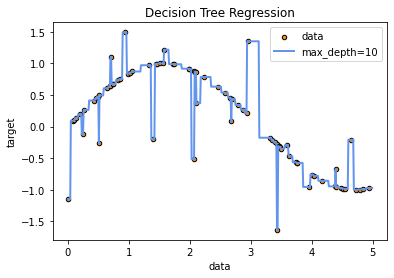

In [22]:
# generatore di numeri random inizializzato con lo stato a 1 per poter replicare
# i risultati
rng = np.random.RandomState(1)

# creo un array di 80 numeri random (matrice 80 X 1) compresi tra
# 0 e 1, moltiplico tutti i valori per 5 e poi li ordino
X = np.sort(5 * rng.rand(80, 1), axis=0)

# stampo gli elementi
# print(X)

# genero i valori per le Y e poi con il metodo ravel 
# trasformo la matrice in un array
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
y = np.sin(X).ravel()

# aggiungo un valore random ogni 5 elementi, partendo dal primo
y[::5] += 3 * (0.5 - rng.rand(16))

# stampo gli elementi
# print(y)

# utilizzo decision tree con massima profondità 10
regr = DecisionTreeRegressor(max_depth=10)

# creo il decision tree partendo dal trainig set (X,y)
regr.fit(X, y)

# predizione

# creo un vettore con tutti gli elementi da 0.0 a 5.0 con passo 0.1 poi
# ne incremento la dimensione di 1 con np.newaxis
# Esempio: np.arange(0,5,1)
# a0 = array([0, 1, 2, 3, 4])
# a0.shape
# (5,)
# array([[0], [1], [2], [3], [4]])
# a1 = np.arange(0, 5, 1)[:,np.newaxis]
# a1.shape
# (5, 1)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# predizione
y_1 = regr.predict(X_test)

# grafico i risultati
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# per mostrare l'albero
# plot_tree(regr)

**Domanda**: che prestazioni ha il modello?

Proviamo a valutare la bontà del modello utilizzando Mean Absolute Error (MAE) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html la cui formula è

$$
\mathrm{MAE} = \frac{\sum_{i = 1}^n |y_i - x_i|}{n}
$$

dove $n$ è il numero di campioni, $y_i$ è il valore predetto ed $x_i$ è il valore reale.

In [23]:
from sklearn.metrics import mean_absolute_error

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(150, 1), axis=0)
y = np.sin(X).ravel()

Utilizzo `train_test_split` per suddividere i dati in training e test. Di default, il 25% dei dati viene mantenuto come test

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = state)

# controllo quanti elementi ci sono
# print(len(X_train))
# print(len(X_test))


In [31]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=3, random_state = state)
regr.fit(X_train, y_train)

# predizione
y_1 = regr.predict(X_test)

# calcolo errore tra y_test e y_1 (valori ottenuti dal decision tree)
MAE = mean_absolute_error(y_test, y_1)

print(f"MAE: {MAE}")

MAE: 0.11644989393725165


**Domanda:** graficare l'andamento di MAE per diversi valori di `max_depth`.

Proviamo con Mean Squared Error (MSE) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html la cui formula è

$$
\mathrm{MSE} = \frac{\sum_{i = 1}^n (y_i - x_i)^2}{n}
$$

In [32]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_1)

print(f"MSE: {MSE}")

MSE: 0.022025169665486233


C'è un parametro che si può impostare (`squared`, di default `True`) per restituire il Root Mean Squared Error (RMSE) la cui formula è

$$
\mathrm{RMSE} = \sqrt{\mathrm{MSE}}
$$

In [33]:
RMSE = mean_squared_error(y_test, y_1, squared = False)

print(f"RMSE: {RMSE}")

# controllo che effettivamente il RMSE sia la radice quadrata del MSE
# import math
# math.sqrt(MSE) == RMSE
# mi aspetto True 

RMSE: 0.1484087924130044


Per graficare più curve nella stessa finestra basta modificare il codice sopra ed inserire una riga del tipo
```
plt.plot(X_test, y_2, color="yellowgreen", label="etichetta", linewidth=2)
```

dove `y_2` è il risutato ottenuto, per esempio, utilizzando un regression tree con parametri differenti.

**Domanda:** graficare l'andamento del MSE al variare della profondità massima  dell'albero (`max_depth`).

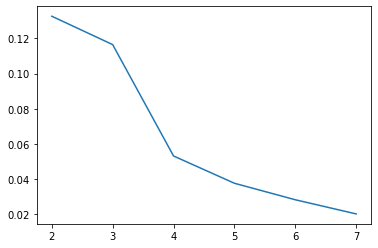

In [38]:
l_mse = []
ld = []
for depth in range(2,8):
    regr = DecisionTreeRegressor(max_depth=depth, random_state = state)
    regr.fit(X_train, y_train)

    # predizione
    y_1 = regr.predict(X_test)

    # calcolo errore tra y_test e y_1 (valori ottenuti dal decision tree)
    MSE = mean_squared_error(y_test, y_1)
    ld.append(depth)
    l_mse.append(MSE)
    
plt.plot(ld, l_mae)